This project is based on the Google Play Store Apps and their ratings. This project focusses on exploratory data analysis and also builds a predictive model to predict the ratings for apps on the Google PlayStore.
I built 3 models and compare their Mean Square Error together to identify which model turns out to be the best in predicting the ratings of the apps.
I have also merged the main dataset with a reviews data set and performed data analysis on it as well.

In [1]:
#Initially import all the packages that are needed

In [2]:
import re
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


%matplotlib inline

Read the Google playstore app into a dataframe called df

In [3]:
df = pd.read_csv("googleplaystore.csv")

In [4]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
#Check the value of first five rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Print the rows and columns of the data

In [6]:

print(df.shape)

(10841, 13)


In [7]:
#Print out the metadata of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
app_review = pd.read_csv('googleplaystore_user_reviews.csv')

Display the columns in the app_review dataframe

In [9]:
app_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Now we can do a small analysis of the types of sentiments these reviews carry

Initially, see all the unique sentiments present in the file

In [10]:
app_review['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

Now we can plot a graph that shows the split of reviews between the sentiments - Positive, Negative and NAN where NAN can be considered as people who gave no reviews or as Neutral reviews

Text(0.5, 1.0, 'Count of Sentiments')

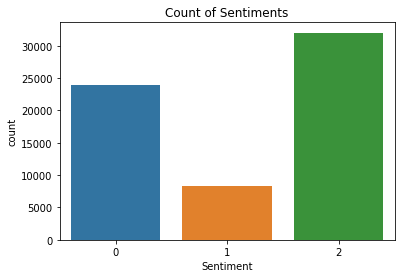

In [11]:
app_review.Sentiment=[0 if i=="Positive" else 1 if i=="Negative" else 2 for i in app_review.Sentiment]


sns.countplot(app_review.Sentiment)
plt.title("Count of Sentiments")

From the above graph, we can see that there are a high number of people who gave no reviews or neutral reviews followed by positive reviews and then negative reviews

Here, we join the main dataset and the app review dataset to perform group_by, melt and reshape 

Joining 2 datasets together -> GooglePlaystore.csv and GooglePlaystore_user_reviews

In [12]:
merge_df= pd.merge(df,app_review, on='App')
merge_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,1,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,1,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,2,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,2,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,0,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122657,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,2,NaN,NaN
122658,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,2,NaN,NaN
122659,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,0,0.200,0.200000
122660,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,2,0.000,0.000000


We can group the apps and their respective ratings according to the Sentiment Polarity

In [13]:
app_rating = merge_df.groupby(['App','Rating'],as_index=False).agg({'Sentiment_Polarity':['max']})
app_rating

,App,Rating,Sentiment_Polarity
,,,max
0,10 Best Foods for You,4.0,1.000000
1,11st,3.8,1.000000
2,1800 Contacts - Lens Store,4.7,0.838542
3,1LINE – One Line with One Touch,4.6,1.000000
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,4.2,1.000000
...,...,...,...
1023,Hotspot Shield Free VPN Proxy & Wi-Fi Security,4.2,1.000000
1024,Hotstar,4.3,1.000000
1025,Hotwire Hotel & Car Rental App,4.3,0.800000


We can then use melt function and create a dataframe with id as App with variables Category, Rating, Reviews, Size and Installs

In [14]:
melted_df = merge_df.melt(id_vars='App',value_vars=['Category','Rating','Reviews','Size','Installs'])
melted_df

,App,variable,value
0,Coloring book moana,Category,ART_AND_DESIGN
1,Coloring book moana,Category,ART_AND_DESIGN
2,Coloring book moana,Category,ART_AND_DESIGN
3,Coloring book moana,Category,ART_AND_DESIGN
4,Coloring book moana,Category,ART_AND_DESIGN
...,...,...,...
613305,A+ Gallery - Photos & Videos,Installs,"10,000,000+"
613306,A+ Gallery - Photos & Videos,Installs,"10,000,000+"
613307,A+ Gallery - Photos & Videos,Installs,"10,000,000+"
613308,A+ Gallery - Photos & Videos,Installs,"10,000,000+"


We can pivot the dataframe back to the way it was i.e. reshape it

In [15]:
pivoted_df = merge_df.pivot_table(columns='Type',index='Category',values='App',aggfunc='max')
pivoted_df

Type,Free,Paid
Category,,
ART_AND_DESIGN,Garden Coloring Book,NaN
AUTO_AND_VEHICLES,Fuelio: Gas log & costs,NaN
BEAUTY,Hairstyles step by step,NaN
BOOKS_AND_REFERENCE,HTC Help,NaN
BUSINESS,HipChat - Chat Built for Teams,NaN
COMICS,Faustop Sounds,NaN
COMMUNICATION,Hiya - Caller ID & Block,NaN
DATING,Hot or Not - Find someone right now,Calculator
EDUCATION,Homework Planner,NaN


Check if there are missing values in each columns of the dataset
Missing values and null values can impact the data. 
So we need to either remove them or impute them with values

In [16]:
#Check for null values
df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [17]:
#Identify the columns that have null values and sort them in descending order
total = df.isnull().sum().sort_values(ascending=False)
total.head(10)

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
dtype: int64

From the above result, we can see that Rating column has the most number of null values in it. Since we are going to build a model with Ratings, we cannot drop the column. So, we can impute it with the median of the values in it. 

In [18]:
#We impute the null values in the Rating column with the median values
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

While initially analyzing the data, we can see that some of the ratings are above 5, which is not possible since the maximum rating of an app in the google play store is 5. So we can see that there is something amiss

In [19]:
df[df['Rating']==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


From the above result, we can see that the rating is 19 here which is wrong. So we can deduce that all data in that particular row has been shifted one decimal point to the right. So we shift the point to left to make the rating right.

In [20]:
df.iloc[10472,1:] = df.iloc[10472,1:].shift(1)
df[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


All the unique values under the Category column are listed now

In [21]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [22]:
print( len(df['Category'].unique()) , "categories")

34 categories


We now use .describe to analyse the app ratings 

In [23]:
df['Rating'].describe()

count     10841.0
unique       40.0
top           4.3
freq       2550.0
Name: Rating, dtype: float64

The average rating given is 4.2. 25% of the reviews are an average of 4.1. 50% of the reviews are an average of 4.3. 75% of the reviews are an average of 4.5

We now visualize the distribution of rating through a graph

Text(0.5, 1.0, 'Distribution of Ratings among the apps')

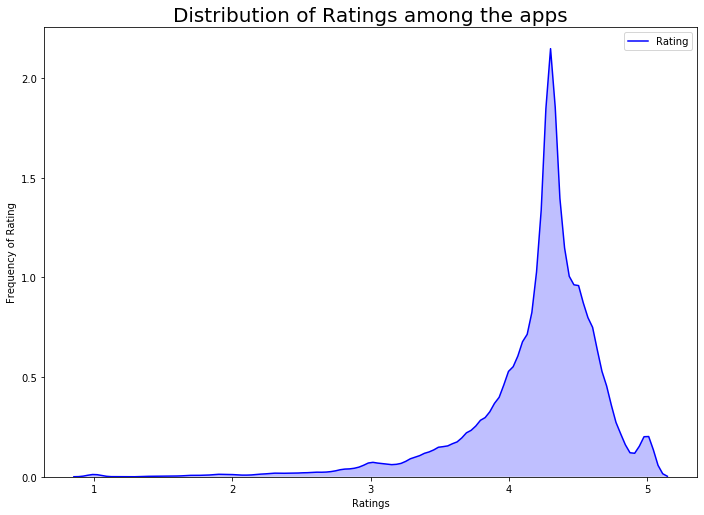

In [24]:
rcParams['figure.figsize'] = 11.7,8.27
rating_graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
rating_graph.set_xlabel("Ratings")
rating_graph.set_ylabel("Frequency of Rating")
plt.title('Distribution of Ratings among the apps',size = 20)

COUNT OF APP IN EACH CATEGORY

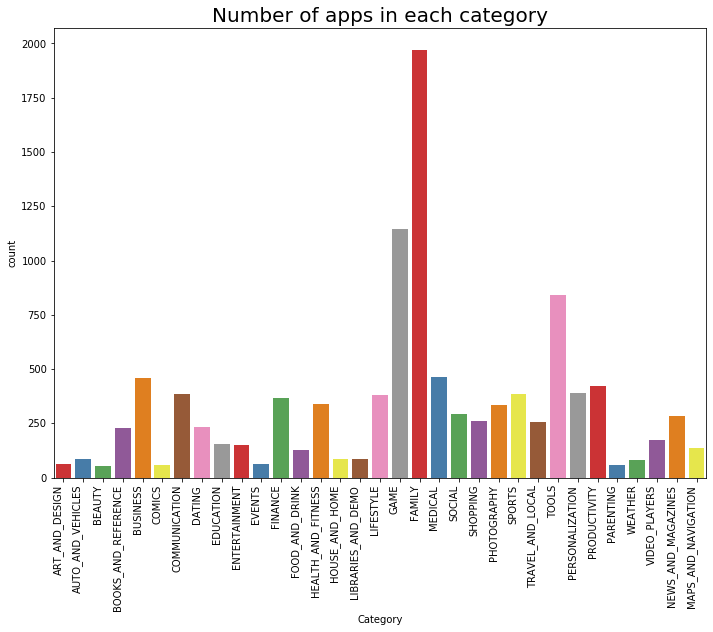

In [25]:
app_count = sns.countplot(x="Category",data=df, palette = "Set1")
app_count.set_xticklabels(app_count.get_xticklabels(), rotation=90, ha="right")
app_count
plt.title('Number of apps in each category',size = 20);

From the above plot, we can see that the categories of Game and Family have the most number of apps

Not all Google Play Store apps are free. Some are paid. So we can plot a pi-chart that shows the percentage count of free and paid apps in the Google PlayStore.

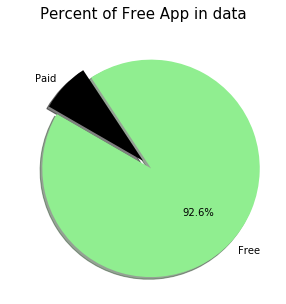

In [26]:
labels =df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)


colors = ["lightgreen","black"]
explode = (0.1,0)  
 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150,)

plt.title('Percent of Free App in data', size = 15)
plt.show()

Word Cloud is one of the most popular visualization tools that helps in showing the most prominent and popular values and choices among the data. 

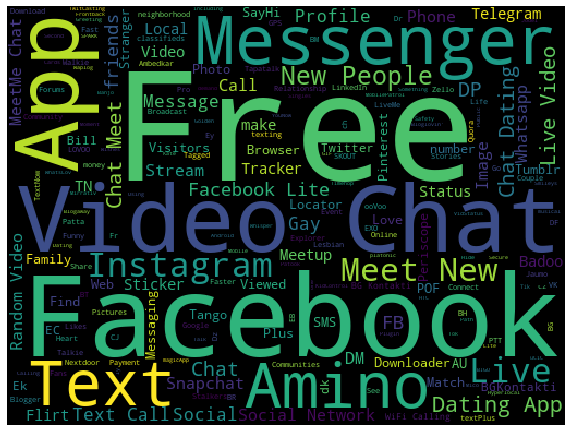

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
xcat = df.App[df.Category == 'SOCIAL']
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='black',
                          width=512,
                          height=384
                         ).generate(" ".join(xcat))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

From the WordCloud we can see that the most popular apps are Facebook, Instagram, Messenger etc.

All apps in the playstore are segregated according to their content Rating as well. We can create a plot to show the distribution of apps among the Content Ratings

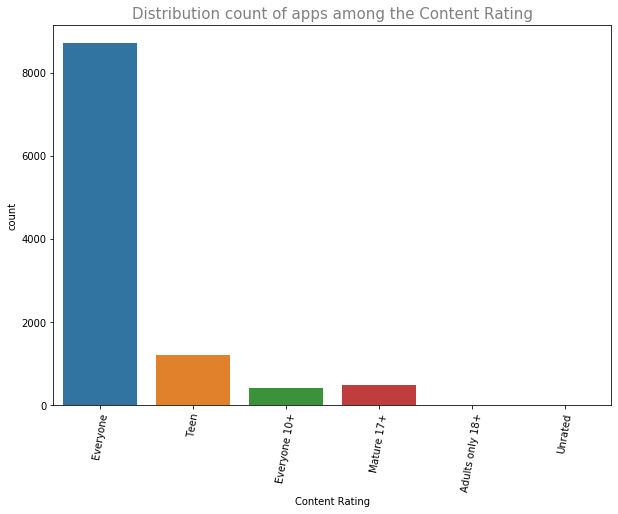

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Distribution count of apps among the Content Rating',color = 'grey',fontsize=15)
plt.show()

We can filter out the most downloaded paid apps in the Google Playstore by ordering them in the descending count of Installs.

In [29]:

df_type=df[df['Type']=='Paid']
df_type.sort_values(by='Installs',ascending=False)['App'].head(20)

9154                               NBA JAM by EA SPORTS™
853                                      Toca Life: City
9478                                Farming Simulator 16
5627                           Five Nights at Freddy's 2
4133                                        Weather Live
9785                        ES File Explorer/Manager PRO
10036                                   ADWLauncher 1 EX
6936                                           Hitman GO
4901                           Assassin's Creed Identity
2151                                     Toca Life: City
7810                                CamScanner (License)
8449                           Cameringo+ Filters Camera
9045                                  Active Soccer 2 DX
4192                        Deaf - Hearing chat device H
4178                           Dialer theme G Black Gold
4173                         G Theme 2 for LG V30, LG G6
8211     ACCDB MDB DB Manager Pro - Editor for MS Access
2299                           

We can start building our predictive models now. I have chosen 3 most common and popular models - > Linear Regression, Support Vector Machines and a  Random Forest Model. I create models with each algorithm and plot them as well. Their mean squared error is calculated and from the model error value we can determine which model can be considered the best prediction model.

Our outcome is to build a prediction model that takes in the relevant related columns and predicts that ratings of an app.

As the first step, we cleaned unnecessary characters in some columns. Now we convert Category from Object datatype to integer datatype

In [30]:
# Converting Category into integers

category_unique = df["Category"].unique()
categoryValCount = len(category_unique)
category_int = {}
for i in range(0,categoryValCount):
    category_int[category_unique[i]] = i
df["Category_c"] = df["Category"].map(category_int).astype(int)

After converting the category datatype to integer, we then reduce the size of installs column values from MB and KB to bytes and fill the null values

In [31]:
#scaling and cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

#filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True)

In [32]:
#Cleaning no of installs classification
##df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

From the above pi chart we got to know the percentage split between free and paid apps. For convenience sake, we turn them into discrete values. If its Free it returns 0. If its paid it is classified as 1

In [33]:
def app_type(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(app_type)

Simialr to categories we convert the content rating column into integer

In [34]:
#Converting content rating classification to integer
Rating_unique = df['Content Rating'].unique()
Rating_int = {}
for i in range(len(Rating_unique)):
    Rating_int[Rating_unique[i]] = i
df['Content Rating'] = df['Content Rating'].map(Rating_int).astype(int)

Some columns are unnecessary to our models and so we can drop them. We used some of them for data analysis but they are not needed for building the model. So we drop the columns off our dataset

In [35]:
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

And now we convert the unique genres to the integer type

In [36]:
#Converting genres to int datatype
Genres_unique = df.Genres.unique()
Genres_int = {}
for i in range(len(Genres_unique)):
    Genres_int[Genres_unique[i]] = i
df['Genres_c'] = df['Genres'].map(Genres_int).astype(int)

We convert price column values to integer datatype. 

In [37]:
#Converting prices to float datatype
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

Convert reviews to int datatype

In [38]:
# convert reviews
df['Reviews'] = df['Reviews'].astype(int)

Convert Ratings to float datatype

In [39]:
df["Rating"] = df.Rating.astype(float)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
Category          10840 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null int32
Size              10841 non-null float64
Installs          10841 non-null object
Type              10841 non-null int64
Price             10841 non-null float64
Content Rating    10841 non-null int32
Genres            10840 non-null object
Category_c        10841 non-null int32
Genres_c          10841 non-null int32
dtypes: float64(3), int32(4), int64(1), object(3)
memory usage: 762.4+ KB


In [41]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",0,0.0,0,Art & Design;Creativity,0,2


In [42]:
 #for dummy variable encoding for Categories
df2 = pd.get_dummies(df, columns=['Category'])

We create a function called as error_rate that calculates the mean squared error and mean absolute error. This function can be used after each model is built to calculate the error rate and subsequently the accuracy of the model

In [44]:
#to add into results_index for evaluation of error term 
def error_rate_add(y_true, y_predict, name = 'Linear Regression'):
    error_rate_matrix = {}
    error_rate_matrix['Model Name'] = name
    error_rate_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    error_rate_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    return error_rate_matrix

We build the first model - Linear Regression. In Linear Regression, we take up a set of independent variables and it predicts on dependent variable y - Rating. 
We split the data set into 70:30 train-test ratio and fit the model

In [45]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.drop(labels = ['Rating','Genres','Category','Installs'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

In [46]:
y_test

5290     4.3
10840    4.5
4861     4.5
261      4.0
7901     4.3
        ... 
3401     4.2
4938     4.8
8446     4.1
6492     4.3
2822     4.5
Name: Rating, Length: 3253, dtype: float64

We create a results dataframe that can hold the result of the model

In [47]:
#Creation of results dataframe and addition of first entry
resultsdf = pd.DataFrame()

resultsdf = resultsdf.append(error_rate_add(y_test,Results, name = 'Linear Regression'),ignore_index = True)

In [48]:
resultsdf

,Mean Absolute Error,Mean Squared Error,Model Name
0,0.314788,0.222771,Linear Regression


We can now plot a graph that shows the linear relation between the values.

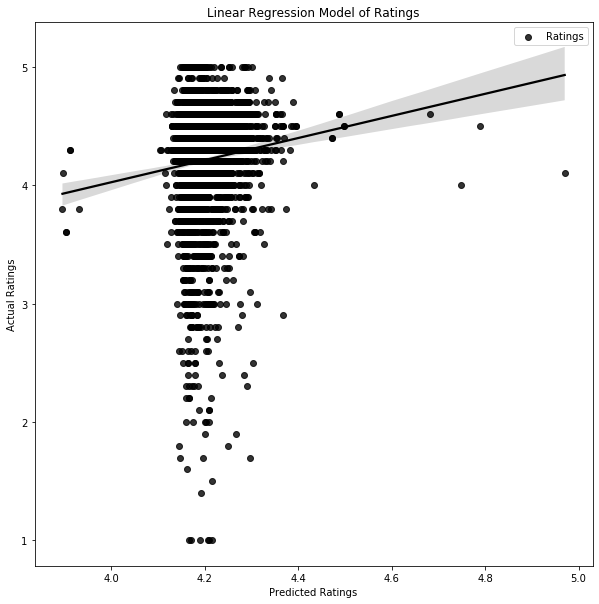

In [49]:
plt.figure(figsize=(10,10))
sns.regplot(Results,y_test,color='black',label='Ratings')
plt.legend()
plt.title('Linear Regression Model of Ratings')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

We now proceed to the next model which is Support Vector Machine and here it is a Support Vector Regression Model.

We drop unnecessary columns and then split the dataset and train the model

In [50]:
from sklearn import svm

X = df.drop(labels = ['Category','Rating','Genres','Installs'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model2 = svm.SVR()
model2.fit(X_train,y_train)

Results2 = model2.predict(X_test)

resultsdf = resultsdf.append(error_rate_add(y_test,Results2, name = 'Support Vector Regression Model'),ignore_index = True)

We now check the error rate of the SVM model that gets added to the dataframe we created earlier

In [51]:
resultsdf

,Mean Absolute Error,Mean Squared Error,Model Name
0,0.314788,0.222771,Linear Regression
1,0.307038,0.246036,Support Vector Regression Model


Finally, we create the Random Forest predictive model.

The unnecessary columns are dropped and the model is fitted and trained.

In [52]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(labels = ['Category','Rating','Genres','Installs'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
Results3 = model3.predict(X_test)


resultsdf = resultsdf.append(error_rate_add(y_test,Results3, name = 'Random Forest Model'),ignore_index = True)



Now can check the mean absolute error of all the models and make an informed decision about which model makes the cut as the most accurate one to predict ratings.

In [54]:
resultsdf

,Mean Absolute Error,Mean Squared Error,Model Name
0,0.314788,0.222771,Linear Regression
1,0.307038,0.246036,Support Vector Regression Model
2,0.309525,0.231344,Random Forest Model


Out of the 3 models built, Support Vector Machine(Regression) model is the most accurate and the same can be used to predict the ratings of the Google Play Store apps successfully.